## Stratification

In [3]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime, timedelta
from dateutil.parser import parse
from cmocean import cm
from salishsea_tools import utilities
import pickle
%matplotlib inline
#%matplotlib qt

In [ ]:
def produce_salinity(gridX, gridY, timestart, timeend, locationname, depthlim = 100):
    # Timerange (datetime objects)
    daterange = [parse(t) for t in [timestart, timeend]]
    
    # Results path
    path = '/results2/SalishSea/nowcast-green.201806'
    
    # Initialize storage arrays
    date = np.empty(0, dtype='object')
    SA = np.empty((0, 40))
    
    # Iterate over number of days in daterange
    bar = utilities.statusbar('Loading ...')
    for day in bar(range(np.diff(daterange)[0].days)):
        
        # Make date and datestrings
        datestamp = daterange[0] + timedelta(days=day)
        datestr1 = datestamp.strftime('%d%b%y').lower()
        datestr2 = datestamp.strftime('%Y%m%d')
        
        # Make filename
        fn = f'SalishSea_1h_{datestr2}_{datestr2}_grid_T.nc'
        
        # Open netCDF
        with xr.open_dataset(os.path.join(path, datestr1, fn)) as T:
        
            # Slice, format, and concatenate results
            date = np.concatenate((date, T.time_counter.values.astype('datetime64[s]').astype(datetime)), axis=0)
            SA = np.concatenate((SA, T.vosaline[..., gridY, gridX].values), axis=0)
    
    # Plot concatenated results
    fig, ax = plt.subplots(1, 1, figsize=(16, 9))
    cax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
    c = ax.contourf(date, T.deptht, SA.T, levels=np.arange(np.min(SA), np.max(SA)), cmap=cm.haline, extend='both')
    ax.set_ylabel('Depth (m)')
    ax.set_ylim([depthlim, 0])
    ax.set_title('Depth V Salinity Timseries at {} from {} to {}'.format(locationname, timestart, timeend))
    fig.colorbar(c, cax=cax)
    cax.set_ylabel('Salinity (g kg-1)')
    plt.savefig('{} {}.png'.format(locationname, timestart), dpi = 300, bbox_inches = 'tight')

In [ ]:
coords = [[256,268], [343,250], [474,252]]
locs = ['Salmon Bank', 'Turn Point', 'SoG']
depthlims = [100,125,420]
for index in range(3):
    for year in range(2015, 2019):
        produce_salinity(coords[index][1], coords[index][0], '{} June 1'.format(str(year)),'{} June 8'.format(str(year)), locs[index], depthlim = depthlims[index])
    

In [51]:
depth = np.array([  0.5     ,   1.500003,   2.500011,   3.500031,   4.500071,   5.500151,
         6.50031 ,   7.500623,   8.501236,   9.502433,  10.504766,  11.509312,
        12.518167,  13.535412,  14.568982,  15.634288,  16.761173,  18.007135,
        19.481785,  21.389978,  24.100256,  28.229916,  34.685757,  44.517723,
        58.484333,  76.58559 ,  98.06296 , 121.866516, 147.08946 , 173.11449 ,
       199.57304 , 226.2603  , 253.06664 , 279.93454 , 306.8342  , 333.75018 ,
       360.67453 , 387.6032  , 414.5341  , 441.4661  ])

In [139]:

def produce_salinity_loc(gridX, gridY, timestart, timeend, locationname, depthlim, date, SA, depth):
    
    # Timerange (datetime objects)
    daterange = [parse(t) for t in [timestart, timeend]]
    
    # Results path
    path = '/results2/SalishSea/nowcast-green.201806'
    
    # Initialize storage arrays

    
    # Iterate over number of days in daterange
    bar = utilities.statusbar('Loading ...')
    for day in bar(range(np.diff(daterange)[0].days)):
        
        # Make date and datestrings
        datestamp = daterange[0] + timedelta(days=day)
        datestr1 = datestamp.strftime('%d%b%y').lower()
        datestr2 = datestamp.strftime('%Y%m%d')
        
        # Make filename
        fn = f'SalishSea_1h_{datestr2}_{datestr2}_grid_T.nc'
        
        # Open netCDF
        with xr.open_dataset(os.path.join(path, datestr1, fn)) as T:
            # Slice, format, and concatenate results
            date = np.concatenate((date, T.time_counter.values.astype('datetime64[s]').astype(datetime)), axis=0)
            SA = np.concatenate((SA, T.vosaline[..., gridY, gridX].values), axis=0)
    return (date, SA)

In [142]:
month = 'June'
daystart = 1
dayend = 8

coords = [[256,268], [343,250], [474,252]]
locs = ['Salmon Bank', 'Turn Point', 'SoG']
depthlims = [100,125,420]
for index in range(3):
    
    for year in range(2015, 2019):
        if year ==  2015:
            date = np.empty(0, dtype='object')
            SA = np.empty((0, 40))
            depth = np.empty((40))
            date, SA = produce_salinity_loc(coords[index][1], coords[index][0], '{} {} {}'.format(str(year), month, daystart),'{} {} {}'.format(str(year), month, dayend), locs[index], depthlims[index], date, SA, depth)
        else: 
            date, SA = produce_salinity_loc(coords[index][1], coords[index][0], '{} {} {}'.format(str(year), month, daystart),'{} {} {}'.format(str(year), month, dayend), locs[index], depthlims[index], date, SA, depth)
    savefile = open('/home/abhudia/Desktop/Temp/' + locs[index] + '{} {} {}'.format(str(year), month, daystart) + '.pickle', 'wb')
    pickle.dump(SA, savefile)
    savefile.close()
    savefile = open('/home/abhudia/Desktop/Temp/' + locs[index] + '{} {} {}'.format(str(year), month, daystart) + 'time.pickle', 'wb')
    pickle.dump(date, savefile)
    savefile.close()

Loading ... 100% (7 of 7) |#####################################|Time:  0:00:26
Loading ... 100% (7 of 7) |#####################################|Time:  0:00:26
Loading ... 100% (7 of 7) |#####################################|Time:  0:00:26
Loading ... 100% (7 of 7) |#####################################|Time:  0:00:26
Loading ... 100% (7 of 7) |#####################################|Time:  0:00:26
Loading ... 100% (7 of 7) |#####################################|Time:  0:00:27
Loading ... 100% (7 of 7) |#####################################|Time:  0:00:27
Loading ... 100% (7 of 7) |#####################################|Time:  0:00:27
Loading ... 100% (7 of 7) |#####################################|Time:  0:00:27
Loading ... 100% (7 of 7) |#####################################|Time:  0:00:26
Loading ... 100% (7 of 7) |#####################################|Time:  0:00:27
Loading ... 100% (7 of 7) |#####################################|Time:  0:00:27


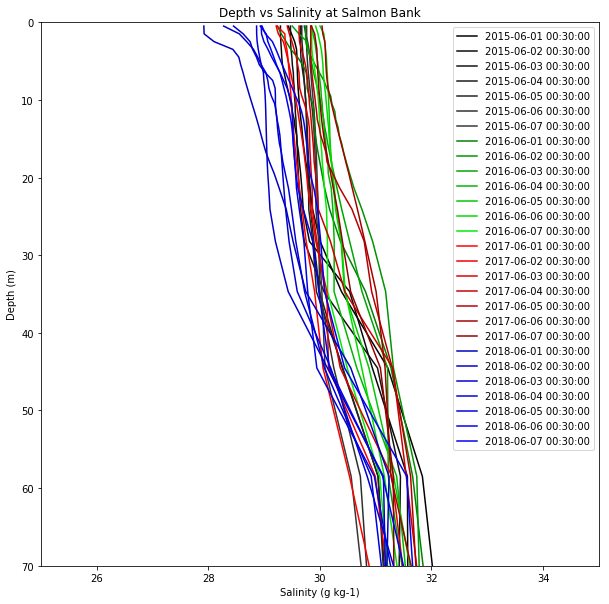

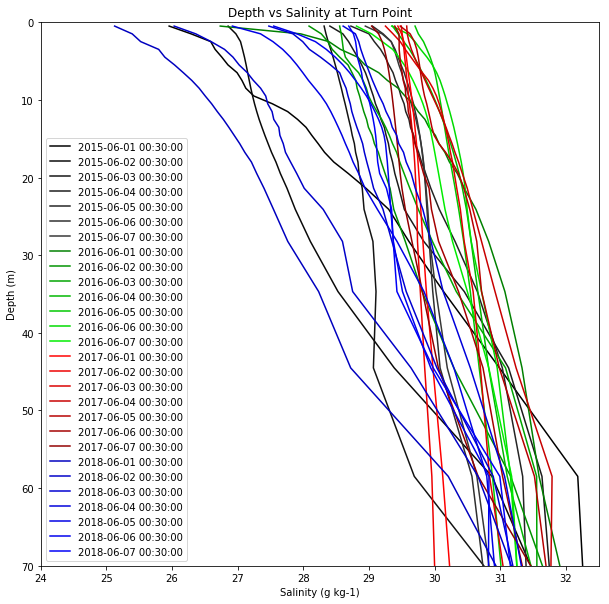

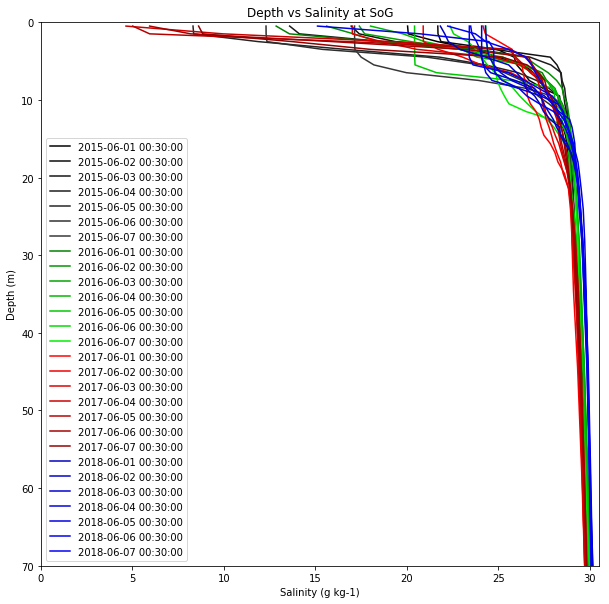

In [143]:
locs = ['Salmon Bank', 'Turn Point', 'SoG']
depthlims = [100,125,420]
xlims = [[25,35],[24,32.5], [0,30.5], ]
counter = -1
for loc in locs:
    counter = counter + 1
    # load data
    opendata = open('/home/abhudia/Desktop/Temp/' + loc + '{} {} {}'.format(str(year), month, daystart) + '.pickle', 'rb')
    data = pickle.load(opendata)
    opentime = open('/home/abhudia/Desktop/Temp/' + loc + '{} {} {}'.format(str(year), month, daystart) + 'time.pickle', 'rb')
    time = pickle.load(opentime)
    fig = plt.figure(figsize = (10,10))
    ax = plt.subplot(111)
    for i in range(672):
        if i % 24 == 0:
            
            if time[i].year == 2015:
                rgb = (i/672,i/672,i/672)
            if time[i].year == 2016:
                rgb = (0, 2*i/672, 0 )
            if time[i].year == 2017:
                rgb = (2*(672-i)/672, 0, 0)
            if time[i].year == 2018:
                rgb = (0, 0, i/672)
            plt.plot(data[i],np.asarray(depth).T, label = time[i], color = rgb)
    plt.gca().invert_yaxis()
    ax.set_ylim([70, 0])
    ax.set_xlim(xlims[counter])
    plt.legend()
    plt.ylabel('Depth (m)')
    plt.xlabel('Salinity (g kg-1)')
    plt.title(f'Depth vs Salinity at {loc}')

In [145]:
## Attempt to animate
#def update(i):
    

locs = ['Salmon Bank', 'Turn Point', 'SoG']
depthlims = [100,125,420]
xlims = [[25,35],[24,32.5], [0,30.5], ]
counter = -1
for loc in locs:
    counter = counter + 1
    # load data
    opendata = open('/home/abhudia/Desktop/Temp/' + loc + '{} {} {}'.format(str(year), month, daystart) + '.pickle', 'rb')
    data = pickle.load(opendata)
    opentime = open('/home/abhudia/Desktop/Temp/' + loc + '{} {} {}'.format(str(year), month, daystart) + 'time.pickle', 'rb')
    time = pickle.load(opentime)

Text(0.5, 1.0, 'Depth vs Salinity at SoG')

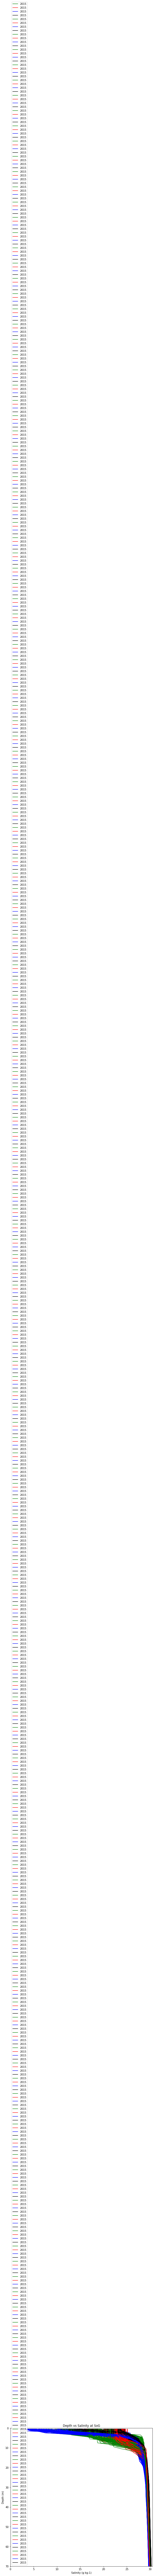

In [147]:
fig = plt.figure(figsize = (10,10))
ax = plt.subplot(111)
def update(i): #24*7
    yr1 = i - 1
    yr2 = i + 167
    yr3 = i + 335
    yr4 = i + 503
    plt.plot(data[yr1],np.asarray(depth).T, label = '2015', color = 'green')
    plt.plot(data[yr2],np.asarray(depth).T, label = '2016', color = 'red')
    plt.plot(data[yr3],np.asarray(depth).T, label = '2017', color = 'blue')
    plt.plot(data[yr4],np.asarray(depth).T, label = '2018', color = 'black')
    plt.gca().invert_yaxis()
    ax.set_ylim([70, 0])
    ax.set_xlim(xlims[counter])
    plt.legend()
    plt.ylabel('Depth (m)')
    plt.xlabel('Salinity (g kg-1)')
    plt.title(f'Depth vs Salinity at {loc}')